**AI mood mate**

In [3]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import shutil


In [4]:
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'
working_train_dir = '/kaggle/working/train'
working_test_dir = '/kaggle/working/test'

# Create folders if not exist
os.makedirs(working_train_dir, exist_ok=True)
os.makedirs(working_test_dir, exist_ok=True)

In [5]:
for emotion in os.listdir(train_dir):
    src_folder = os.path.join(train_dir, emotion)
    dst_folder = os.path.join(working_train_dir, emotion)
    os.makedirs(dst_folder, exist_ok=True)
    for img_name in os.listdir(src_folder):
        shutil.copy(os.path.join(src_folder, img_name), dst_folder)

for emotion in os.listdir(test_dir):
    src_folder = os.path.join(test_dir, emotion)
    dst_folder = os.path.join(working_test_dir, emotion)
    os.makedirs(dst_folder, exist_ok=True)
    for img_name in os.listdir(src_folder):
        shutil.copy(os.path.join(src_folder, img_name), dst_folder)


step2: Count Images Per Emotion

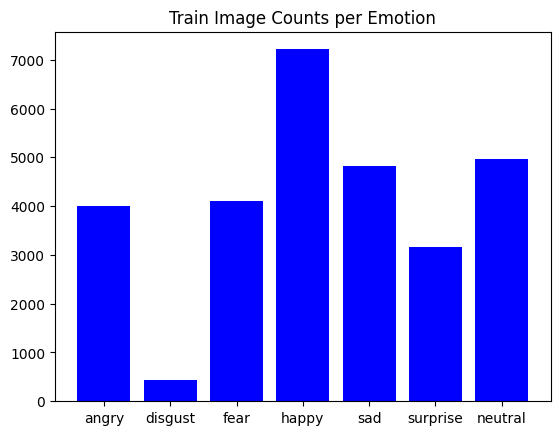

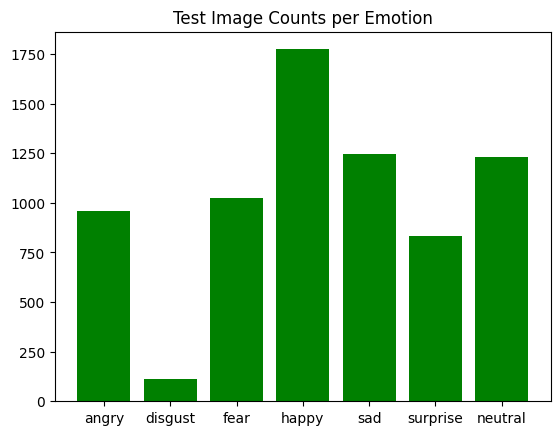

In [6]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

train_counts = {emotion: len(os.listdir(os.path.join(working_train_dir, emotion))) for emotion in emotions}
test_counts = {emotion: len(os.listdir(os.path.join(working_test_dir, emotion))) for emotion in emotions}

plt.bar(train_counts.keys(), train_counts.values(), color='blue')
plt.title('Train Image Counts per Emotion')
plt.show()

plt.bar(test_counts.keys(), test_counts.values(), color='green')
plt.title('Test Image Counts per Emotion')
plt.show()


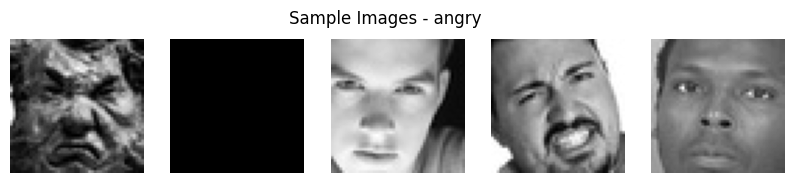

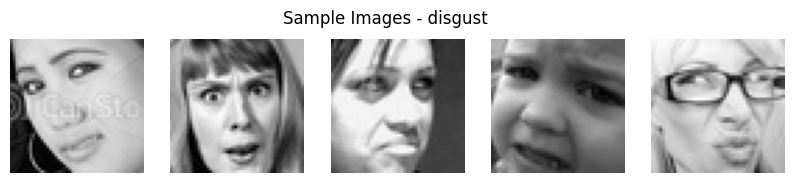

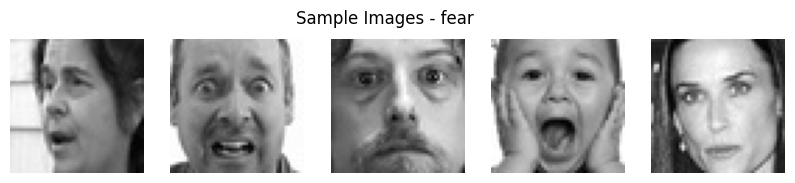

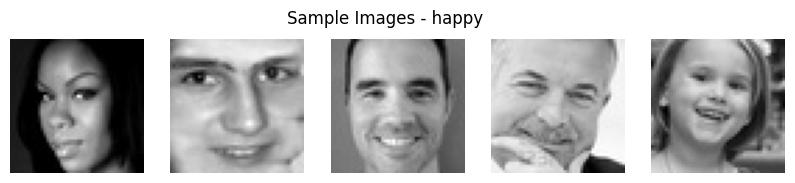

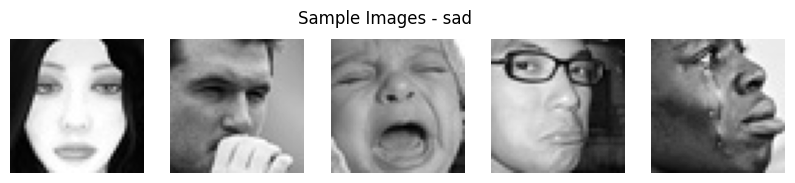

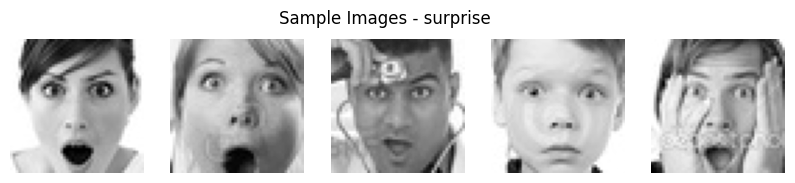

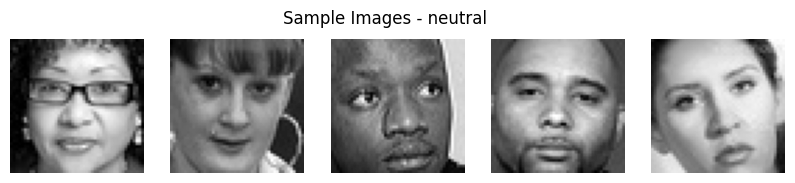

In [7]:
for emotion in emotions:
    folder = os.path.join(working_train_dir, emotion)
    plt.figure(figsize=(10, 2))
    for i, img_name in enumerate(os.listdir(folder)[:5]):  # show 5 images per emotion
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Sample Images - {emotion}')
    plt.show()


In [8]:
angry_folder = os.path.join(working_train_dir, 'angry')
disgust_folder = os.path.join(working_train_dir, 'disgust')

for img_name in os.listdir(disgust_folder):
    src_path = os.path.join(disgust_folder, img_name)
    dst_path = os.path.join(angry_folder, img_name)
    shutil.copy(src_path, dst_path)  # Use copy, not move, in Kaggle

# Optionally, remove Disgust folder after merging if desired
# shutil.rmtree(disgust_folder)


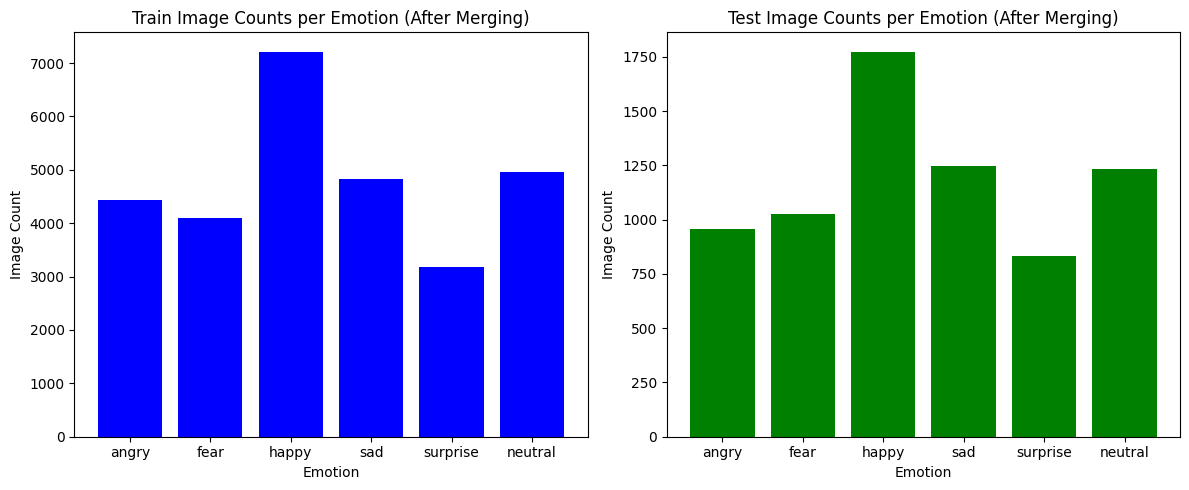

In [9]:
import matplotlib.pyplot as plt
import os

# Updated emotions list after merging (Disgust merged into Angry, so exclude Disgust)
updated_emotions = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Count images for each emotion in training and test sets
train_counts_merged = {emotion: len(os.listdir(os.path.join(working_train_dir, emotion))) for emotion in updated_emotions}
test_counts_merged = {emotion: len(os.listdir(os.path.join(working_test_dir, emotion))) for emotion in updated_emotions}

# Plot training image counts
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(train_counts_merged.keys(), train_counts_merged.values(), color='blue')
plt.title('Train Image Counts per Emotion (After Merging)')
plt.xlabel('Emotion')
plt.ylabel('Image Count')

# Plot test image counts
plt.subplot(1, 2, 2)
plt.bar(test_counts_merged.keys(), test_counts_merged.values(), color='green')
plt.title('Test Image Counts per Emotion (After Merging)')
plt.xlabel('Emotion')
plt.ylabel('Image Count')

plt.tight_layout()
plt.show()


In [10]:
import cv2
import numpy as np
import os

updated_emotions = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']

corrupted_files = {}
image_sizes = {}

def check_and_collect_sizes(folder):
    corrupted = []
    sizes = set()
    for fname in os.listdir(folder):
        img_path = os.path.join(folder, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            corrupted.append(fname)
            continue
        # Directly reshape to (48,48,1) for CNN
        img_cnn = img.reshape(48, 48, 1)
        sizes.add(img_cnn.shape)
    return corrupted, sizes

# Check train set
for emotion in updated_emotions:
    folder = os.path.join(working_train_dir, emotion)
    corrupted, sizes = check_and_collect_sizes(folder)
    if corrupted:
        corrupted_files[emotion] = corrupted
    image_sizes[emotion] = sizes

print("Corrupted images found per emotion:", corrupted_files)
print("Image sizes per emotion:", image_sizes)

Corrupted images found per emotion: {}
Image sizes per emotion: {'angry': {(48, 48, 1)}, 'fear': {(48, 48, 1)}, 'happy': {(48, 48, 1)}, 'sad': {(48, 48, 1)}, 'surprise': {(48, 48, 1)}, 'neutral': {(48, 48, 1)}}


**CNN**

step1:Merge Disgust into Angry for TESTING data 

In [11]:
import os
import shutil

test_emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in test_emotions:
    old_folder = os.path.join(working_test_dir, emotion.capitalize())  
    new_folder = os.path.join(working_test_dir, emotion.lower())
    if os.path.exists(old_folder) and not os.path.exists(new_folder):
        os.rename(old_folder, new_folder)
        print(f"Renamed {old_folder} -> {new_folder}")

# Now merge disgust into angry (TEST SET)
angry_folder = os.path.join(working_test_dir, 'angry')
disgust_folder = os.path.join(working_test_dir, 'disgust')

print("\nMerging disgust -> angry (TEST SET)...")
for img_name in os.listdir(disgust_folder):
    src_path = os.path.join(disgust_folder, img_name)
    dst_path = os.path.join(angry_folder, img_name)
    shutil.copy(src_path, dst_path)  
    

# Remove disgust folder
shutil.rmtree(disgust_folder)

# Verify final 6 emotions (lowercase)
final_test_emotions = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
test_counts = {e: len(os.listdir(os.path.join(working_test_dir, e))) for e in final_test_emotions}
print("Test counts after merge:", test_counts)



Merging disgust -> angry (TEST SET)...
Test counts after merge: {'angry': 1069, 'fear': 1024, 'happy': 1774, 'sad': 1247, 'surprise': 831, 'neutral': 1233}


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255, rotation_range=10, width_shift_range=0.1,
    height_shift_range=0.1, horizontal_flip=True, zoom_range=0.1
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    working_train_dir, target_size=(48, 48), color_mode='grayscale',
    batch_size=64, class_mode='categorical',
    classes=['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
)

test_generator = test_datagen.flow_from_directory(
    working_test_dir, target_size=(48, 48), color_mode='grayscale',
    batch_size=64, class_mode='categorical',
    classes=['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral'], shuffle=False
)


Found 28709 images belonging to 6 classes.
Found 7178 images belonging to 6 classes.


Model Building

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 158s 339ms/step - accuracy: 0.2024 - loss: 2.3633 - val_accuracy: 0.2476 - val_loss: 1.7724 - learning_rate: 0.0010
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 152s 337ms/step - accuracy: 0.2399 - loss: 1.7844 - val_accuracy: 0.3140 - val_loss: 1.6626 - learning_rate: 0.0010
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 152s 337ms/step - accuracy: 0.2928 - loss: 1.6746 - val_accuracy: 0.3598 - val_loss: 1.5387 - learning_rate: 0.0010
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.3420 - loss: 1.5923 - val_accuracy: 0.3162 - val_loss: 1.7525 - learning_rate: 0.0010
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.4000 - loss: 1.4928 - val_accuracy: 0.4459 - val_loss: 1.4218 - learning_rate: 0.0010
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 152s 339ms/step - accuracy: 0.4374 - loss: 1.4197 - val_accuracy: 0.4880 - val_loss: 1.2867 - learning_rate: 0.0010
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 152s 339ms/step - accuracy: 0.4654 

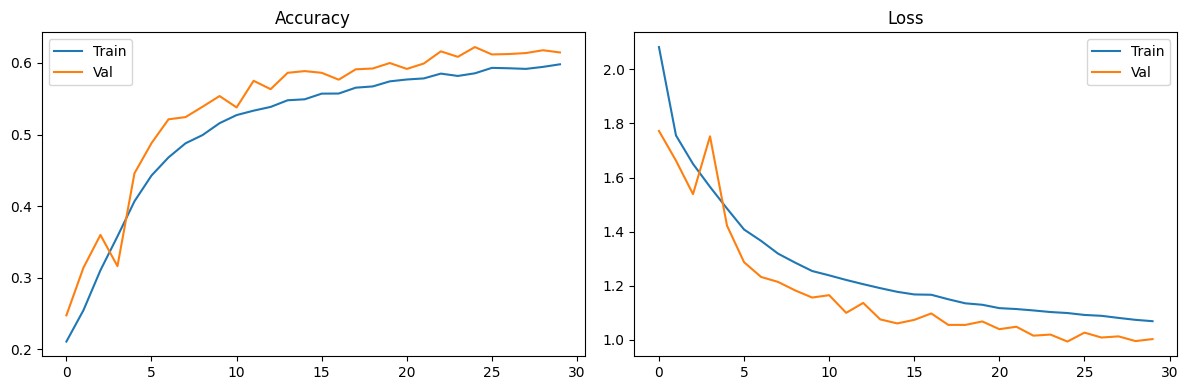

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5714 - loss: 1.0690
FINAL TEST ACCURACY: 0.6222


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Build model
model = Sequential([
    Conv2D(32, (3,3),
    activation='relu',
    input_shape=(48,48,1)), 
    BatchNormalization(), 
    
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2), Dropout(0.25),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(), 
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2), Dropout(0.25),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(), 
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2), Dropout(0.25),
    
    Flatten(), Dense(256, activation='relu'), 
    BatchNormalization(), Dropout(0.5),
    
    Dense(128, activation='relu'), Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
]

history = model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=callbacks)

# Training plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); 
plt.plot(history.history['accuracy'], label='Train'); 
plt.plot(history.history['val_accuracy'], label='Val'); 
plt.legend(); 
plt.title('Accuracy')
plt.subplot(1,2,2); plt.plot(history.history['loss'], label='Train'); 
plt.plot(history.history['val_loss'], label='Val'); 
plt.legend(); plt.title('Loss')
plt.tight_layout(); 
plt.show()


test_loss, test_acc = model.evaluate(test_generator)
print(f"FINAL TEST ACCURACY: {test_acc:.4f}")

model.save('/kaggle/working/fer_cnn_6emotions.keras')

In [21]:
print(f"FINAL TEST ACCURACY: {test_acc:.4f} ({test_acc*100:.2f}%)")

FINAL TEST ACCURACY: 0.6222 (62.22%)


In [15]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,358,132 (5.18 MB)

 Trainable params: 452,390 (1.73 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 904,782 (3.45 MB)

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step


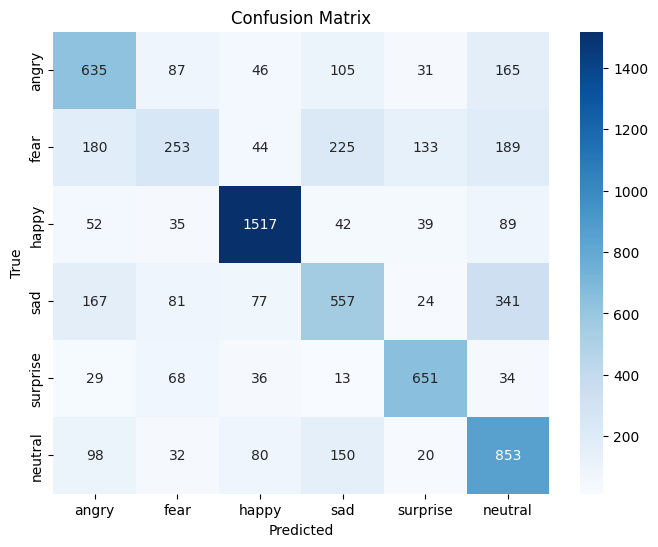

In [16]:
# Confusion Matrix
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()